In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

In [3]:
data = xr.open_dataset("/Users/james/Documents/Rutgers/data/nwa25-output/19961223.ocean_5day.test.nc")
data

<xarray.Dataset>
Dimensions:     (nv: 2, xh: 1550, xq: 1551, yh: 1690, yq: 1691, z_i: 36, z_l: 35)
Coordinates:
  * xq          (xq) float64 -98.04 -98.0 -97.96 -97.92 ... -36.14 -36.1 -36.06
  * yh          (yh) float64 5.253 5.292 5.332 5.372 ... 51.91 51.92 51.93 51.94
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
    time        object ...
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 -98.02 -97.98 -97.94 -97.9 ... -36.16 -36.12 -36.08
  * yq          (yq) float64 5.233 5.273 5.312 5.352 ... 51.91 51.92 51.93 51.94
Data variables:
    u           (z_l, yh, xq) float32 ...
    v           (z_l, yq, xh) float32 ...
    temp        (z_l, yh, xh) float32 ...
    salt        (z_l, yh, xh) float32 ...
    average_T1  datetime64[ns] ...
    average_T2  datetime64[ns] ...
    average_DT  timedelta64[ns] ...
    time_bnds   (nv) timedelta64[ns] ...
Attributes:
    filename:          19960828.ocean_5day.nc
    title:             NWA25_glorys_era5
    associated_files:  areacello: 19960828.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

In [4]:
data = data.metpy.parse_cf()

In [5]:
data = data[['salt', 'temp']]

In [6]:
data

<xarray.Dataset>
Dimensions:    (xh: 1550, yh: 1690, z_l: 35)
Coordinates:
  * yh         (yh) float64 5.253 5.292 5.332 5.372 ... 51.91 51.92 51.93 51.94
  * z_l        (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    time       object 1996-12-23 15:00:00
    metpy_crs  object Projection: latitude_longitude
  * xh         (xh) float64 -98.02 -97.98 -97.94 -97.9 ... -36.16 -36.12 -36.08
Data variables:
    salt       (z_l, yh, xh) float32 ...
    temp       (z_l, yh, xh) float32 ...
Attributes:
    filename:          19960828.ocean_5day.nc
    title:             NWA25_glorys_era5
    associated_files:  areacello: 19960828.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

In [7]:
start = (35.0, -70.0)
end = (40, -50)

In [8]:
cross = cross_section(data, start, end).set_coords(('yh', 'xh'))
print(cross)

<xarray.Dataset>
Dimensions:    (index: 100, z_l: 35)
Coordinates:
  * z_l        (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    time       object 1996-12-23 15:00:00
    metpy_crs  object Projection: latitude_longitude
    xh         (index) float64 -70.0 -69.81 -69.62 ... -50.43 -50.21 -50.0
    yh         (index) float64 35.0 35.07 35.13 35.2 ... 39.9 39.93 39.97 40.0
  * index      (index) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Data variables:
    salt       (z_l, index) float64 36.6 36.6 36.6 36.6 36.6 ... nan nan nan nan
    temp       (z_l, index) float64 18.94 18.79 18.73 18.78 ... nan nan nan nan
Attributes:
    filename:          19960828.ocean_5day.nc
    title:             NWA25_glorys_era5
    associated_files:  areacello: 19960828.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A


In [9]:
cross['z_l'] = cross['z_l'] * -1

In [10]:
cross['yh'][1]

<xarray.DataArray 'yh' ()>
array(35.06665908)
Coordinates:
    time       object 1996-12-23 15:00:00
    metpy_crs  object Projection: latitude_longitude
    xh         float64 -69.81
    yh         float64 35.07
    index      int64 1
Attributes:
    long_name:       h point nominal latitude
    units:           degrees_north
    cartesian_axis:  Y
    _metpy_axis:     y,latitude

/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


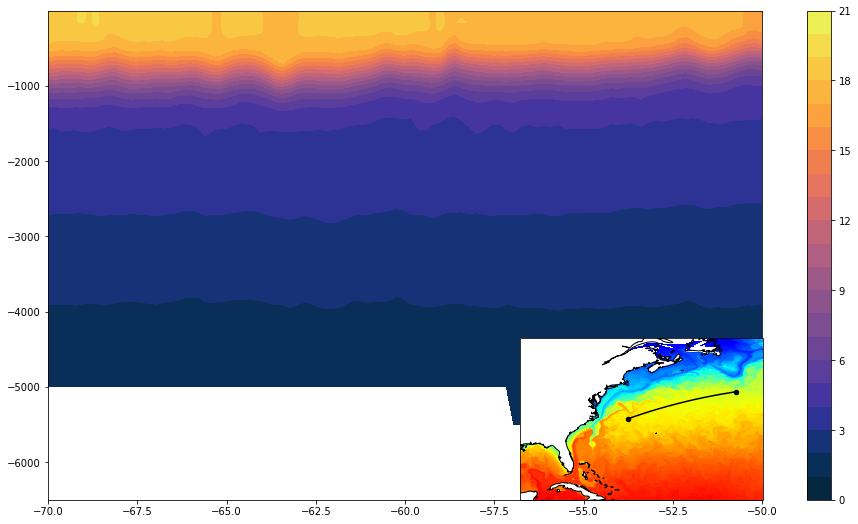

In [15]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['xh'], cross['z_l'], cross['temp'], cmap=cmocean.cm.thermal,levels=np.arange(0, 22, 1))
rh_colorbar = fig.colorbar(rh_contour)

# Plot the path of the cross section
ax_inset = fig.add_axes([0.515, 0.125, 0.25, 0.25], projection=ccrs.PlateCarree(), ylim=(20,50), xlim=(-90,-45))
ax_inset.pcolormesh(data['xh'], data['yh'], data['temp'].isel(z_l=0), cmap='jet')
ax_inset.plot(cross['xh'], cross['yh'], c='k', zorder=2)
ax_inset.scatter(np.array(start)[1], np.array(start)[0], c='k', zorder=50,s=20,transform=ccrs.PlateCarree())
ax_inset.scatter(np.array(end)[1], np.array(end)[0], c='k', zorder=50,s=20,transform=ccrs.PlateCarree())
ax_inset.coastlines()

plt.show()

In [1]:
import xarray as xr

In [ ]:
b = xr.open_dataset("/Users/james/Downloads")